In [1]:
import bagpy
import cv2
import PIL
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from bagpy import bagreader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import bagpy
import seaborn as sns
pd.set_option('display.max_rows', None)

<h2> Читаем все, что хранит в себе чудо-файл .bag <h2>

In [2]:
bagfile = bagreader(r'C:/Users/sasha/Downloads/Баг для проекта.bag')

[INFO]  Data folder C:/Users/sasha/Downloads/Баг для проекта already exists. Not creating.


In [3]:
data = pd.DataFrame({'Name': ['Petr', 'Vasily', 'Misha'], 'Age': [15, 14, 12]})

In [4]:
data

,Name,Age
0,Petr,15
1,Vasily,14
2,Misha,12


<h2> Читаем сводную таблицу о работе датчиков, о их типах итд, короче все, что есть <h2>

In [5]:
bagfile.topic_table

,Topics,Types,Message Count,Frequency
0,/device_0/info,diagnostic_msgs/KeyValue,13,NaN
1,/device_0/sensor_0/Depth_0/image/data,sensor_msgs/Image,339,14.988782
2,/device_0/sensor_0/Depth_0/image/metadata,diagnostic_msgs/KeyValue,8136,NaN
3,/device_0/sensor_0/Depth_0/info,realsense_msgs/StreamInfo,1,NaN
4,/device_0/sensor_0/Depth_0/info/camera_info,sensor_msgs/CameraInfo,1,NaN
5,/device_0/sensor_0/Depth_0/tf/0,geometry_msgs/Transform,1,NaN
6,/device_0/sensor_0/info,diagnostic_msgs/KeyValue,2,NaN
7,/device_0/sensor_0/option/Asic_Temperature/des...,std_msgs/String,1,NaN
8,/device_0/sensor_0/option/Asic_Temperature/value,std_msgs/Float32,1,NaN
9,/device_0/sensor_0/option/Depth_Units/description,std_msgs/String,1,NaN


<h2> Удаляем нулы из поля Frequency(частота), оставляем только те датчики, которые работали <h2>

In [6]:
bag_with_data = bagfile.topic_table.dropna()

In [7]:
bag_with_data

,Topics,Types,Message Count,Frequency
1,/device_0/sensor_0/Depth_0/image/data,sensor_msgs/Image,339,14.988782
50,/device_0/sensor_1/Color_0/image/data,sensor_msgs/Image,339,14.980351
89,/device_0/sensor_2/Accel_0/imu/data,sensor_msgs/Imu,2303,102.132026
94,/device_0/sensor_2/Gyro_0/imu/data,sensor_msgs/Imu,4525,200.208858


<h2> А теперь переводим в табличныe csv файлs все данные с четырех работавших датчиков. Метод message_by_topic - literally "сообщения, которые передал датчик" <h2>

In [8]:
Accel_csv_file = bagfile.message_by_topic('/device_0/sensor_2/Accel_0/imu/data')
Depth_csv_file = bagfile.message_by_topic('/device_0/sensor_0/Depth_0/image/data')
Color_csv_file = bagfile.message_by_topic('/device_0/sensor_1/Color_0/image/data')
Gyro_csv_file = bagfile.message_by_topic('/device_0/sensor_2/Gyro_0/imu/data')

<h2>Читаем csv файлы с показателями датчиков, записываем в переменные<h2>

In [ ]:
Accel_Df = pd.read_csv(Accel_csv_file)
Depth_Df = pd.read_csv(Depth_csv_file)
Color_Df = pd.read_csv(Color_csv_file)
Gyro_Df = pd.read_csv(Gyro_csv_file)

In [ ]:
Color_Df

In [ ]:
Depth_Df

## Построим несколько графиков по данным с акселерометра

## Линейное ускорение по оси X

<AxesSubplot:xlabel='Time', ylabel='linear_acceleration.x'>

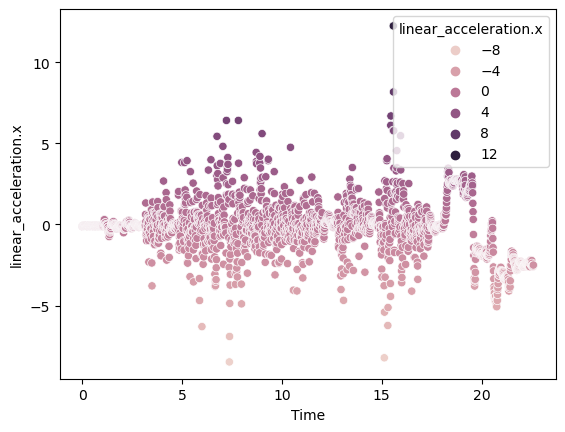

In [71]:
sns.scatterplot(data=Accel_Df, x='Time', y='linear_acceleration.x', hue = 'linear_acceleration.x')

## Линейное ускорение по оси Y

<AxesSubplot:xlabel='Time', ylabel='linear_acceleration.y'>

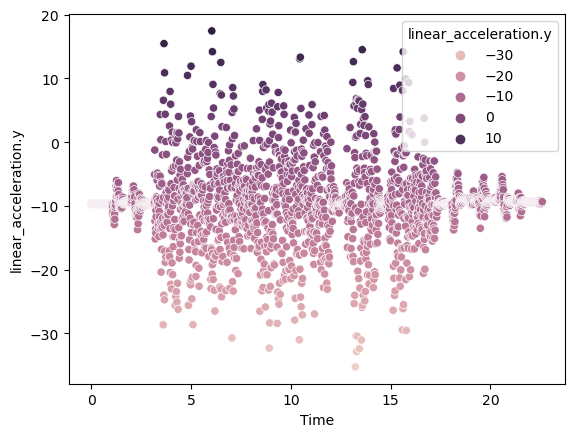

In [72]:
sns.scatterplot(data=Accel_Df, x='Time', y='linear_acceleration.y', hue = 'linear_acceleration.y')

## Линейное ускорение по оси Z

<AxesSubplot:xlabel='Time', ylabel='linear_acceleration.z'>

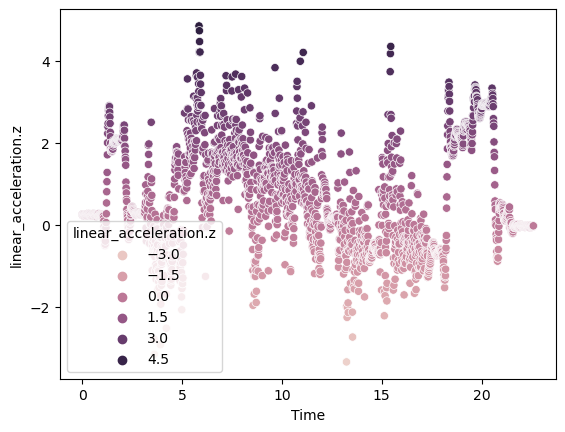

In [73]:
sns.scatterplot(data=Accel_Df, x='Time', y='linear_acceleration.z', hue = 'linear_acceleration.z')

# Построим графики, используя гироскопический датчик. Мы можем построить графики угловой скорости в зависимости от времени по каждой из трёх осей X, Y, Z

## Угловая скорость по оси X

<AxesSubplot:xlabel='Time', ylabel='angular_velocity.x'>

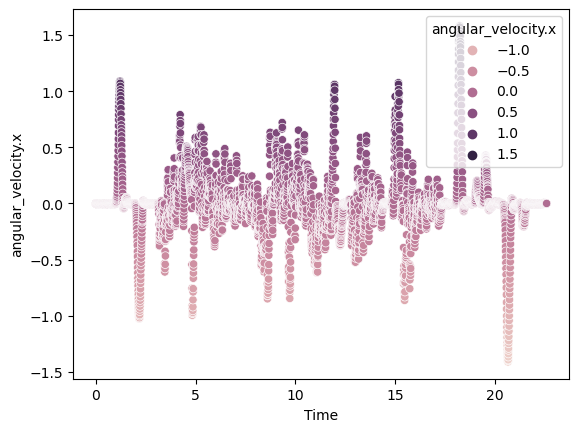

In [74]:
sns.scatterplot(data=Gyro_Df, x='Time', y='angular_velocity.x', hue = 'angular_velocity.x')

## Угловая скорость по оси Y

<AxesSubplot:xlabel='Time', ylabel='angular_velocity.y'>

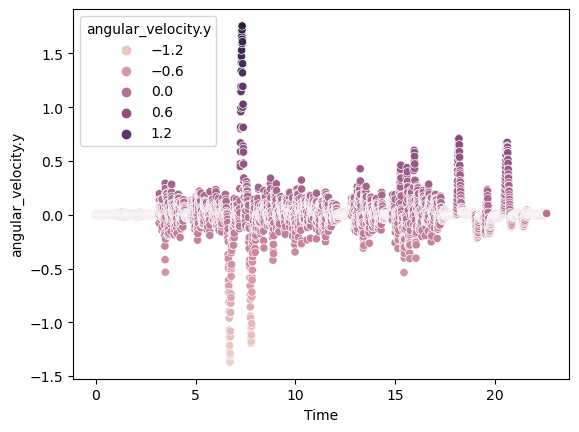

In [75]:
sns.scatterplot(data=Gyro_Df, x='Time', y='angular_velocity.y', hue = 'angular_velocity.y')

## Угловая скорость по оси Z

<AxesSubplot:xlabel='Time', ylabel='angular_velocity.z'>

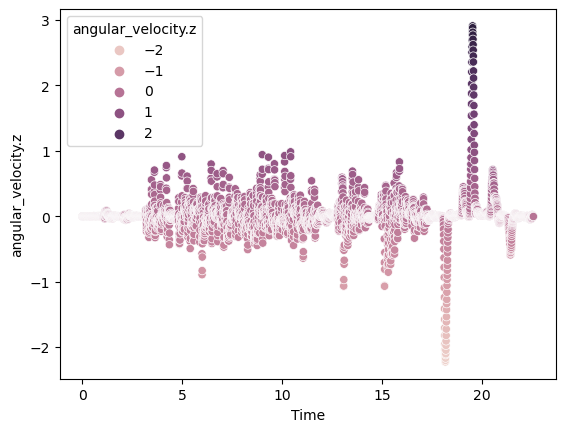

In [76]:
sns.scatterplot(data=Gyro_Df, x='Time', y='angular_velocity.z', hue = 'angular_velocity.z')

<h2>Далее - функции преобразрвания одного кадра в изображение для color и depth, а также функции, открывающие записи видео <h2>

In [80]:
Height = 480
Width = 640
def to_color_image(data):
    raw_string = data
    # преобразовать в байтовую строку с включенными escape-символами
    byte_string = raw_string[2:-1].encode('latin1')
    # удалить эскейп символы
    escaped_string = byte_string.decode('unicode_escape')
    # преобразовать обратно в байтовую строку без экранированных символов
    byte_string = escaped_string.encode('latin1')
    #создание массива NumPy из байтовой строки
    nparr = np.frombuffer(byte_string, np.uint8)
    # преобразовать в 3 мерный массив RGB (высота x ширина x 3(R and G and B))
    rgb = nparr.reshape((Height, Width, -1))
    return rgb 

def to_depth_image(data):
    raw_string = data
    # преобразовать в байтовую строку с включенными escape-символами
    byte_string = raw_string[2:-1].encode('latin1')
    # удалить эскейп символы
    escaped_string = byte_string.decode('unicode_escape')
    # преобразовать обратно в байтовую строку без экранированных символов
    byte_string = escaped_string.encode('latin1')
    #создание массива NumPy из байтовой строки
    nparr = np.frombuffer(byte_string, np.uint8)
    # преобразовать в 3 мерный массив изображений RGB (высота x ширина x 3(R and G and B))
    depth = nparr.reshape((Height, Width, -1))
    # Делаем пустой тензор, глубиной на единицу больше, чем depth
    depth_three_chanel_zeros = np.zeros((depth.shape[0], depth.shape[1], depth.shape[2]+1))
    # Копирование двух слоев depth в массив с нулями, чтобы получить массив с тремя слоями глубины
    depth_three_chanel_zeros[:,:,0:2] = depth
    # PIL умеет делать изображение только из массива чисел в формате uint8, поэтому меняем тип 
    depth_three_chanel = depth_three_chanel_zeros.astype('uint8')
    return depth_three_chanel

# открываем запись видео
format_video_color = cv2.VideoWriter_fourcc(*'mp4v') # формат видео
video_from_color = cv2.VideoWriter('rgb.mp4', format_video_color, 15.0, (640, 480))
format_video_depth = cv2.VideoWriter_fourcc(*'mp4v') # формат видео
video_from_depth = cv2.VideoWriter('depth.mp4', format_video_depth, 15.0, (640, 480))

def to_animation_rgb(rgb):
    video_from_color.write(cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR))

def to_animation_depth(depth):
    video_from_depth.write(cv2.cvtColor(depth, cv2.COLOR_RGB2BGR))

<h2>Пробуем применить функцию к рандомному depth кадру, убеждаемся, что все работает. Плюс экспериментируем с преобразованием в изображение <h2>

In [81]:
to_depth_image(Depth_Df['data'][100]).astype('uint32')

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [181,  11,   0],
        [196,  11,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [196,  11,   0],
        [196,  11,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 18,   2,   0],
        [ 18,   2,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 18,   2,   0],
        [ 18,   2,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

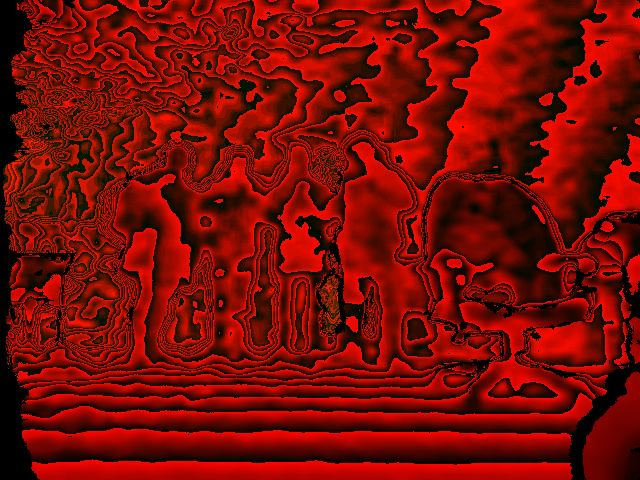

In [82]:
# Вот теперь мы умеем делать depth и color изображения из собачьих данных
PIL.Image.fromarray(to_depth_image(Depth_Df['data'][100]))

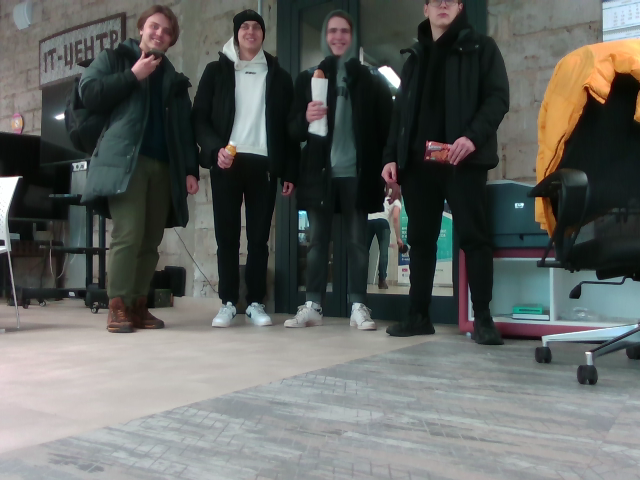

In [83]:
PIL.Image.fromarray(to_color_image(Color_Df['data'][0]))

<h2> Применяем ко всем строкам поля 'data' сначала функцию, преобразующую исходную строку в тензор битов, а потом функцию, закрывающую запись видео<h2>

In [84]:
Color_Df['image'] = Color_Df['data'].apply(to_color_image)

In [85]:
Color_Df['image'].apply(to_animation_rgb)
video_from_color.release()

In [86]:
Depth_Df['image'] = Depth_Df['data'].apply(to_depth_image)

In [87]:
Depth_Df['image'].apply(to_animation_depth)
video_from_depth.release()

<h2> Ура, все работает, а видео лежат в папке с .ipynb файлом<h2>